# Benchmark Vega with picca fitter2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from picca.fitter2.control import fitter2
from vega import VegaInterface, Wedge

### Function to compute $\xi$ model from fitter2

In [2]:
def xi_model(fitter, pars, i=0, full_shape=False):
    data = fitter.chi2.data[i]
    k = fitter.chi2.k
    pk_full = fitter.chi2.pk_lin
    pk_smooth = fitter.chi2.pksb_lin
    
    pars['SB'] = False
    
    # Compute the peak component
    xi_peak = data.xi_model(k, pk_full-pk_smooth, pars)
    
    pars['SB'] = True & (not full_shape)
    sigmaNL_par = pars['sigmaNL_par']
    sigmaNL_per = pars['sigmaNL_per']
    pars['sigmaNL_par'] = 0.
    pars['sigmaNL_per'] = 0.
    
    # Compute the smooth component
    xi_sb = data.xi_model(k, pk_smooth, pars)
    
    pars['SB'] = False
    pars['sigmaNL_par'] = sigmaNL_par
    pars['sigmaNL_per'] = sigmaNL_per

    # Compute the full correlation
    xi_full = pars['bao_amp']*xi_peak + xi_sb
    
    return xi_full

### Function to plot $\xi$ models

In [3]:
def plot_xi(models, cov, labels=None, rp=(0,200,50), number=0):
    plt.rcParams['figure.figsize'] = 18,12
    plt.rcParams['font.size'] = 14
    fig, axs = plt.subplots(2,2)

    axs = np.array(axs).reshape(-1)
    mus= [0., 0.5, 0.8, 0.95, 1.]
    mu_zip = zip(mus[:-1],mus[1:])

    for i, mu in enumerate(mu_zip):
        wedge = Wedge(rp=rp, mu=mu, scaling=20)

        for j, model in enumerate(models):
            r, d, d_cov = wedge(model, cov)
            if labels is None:
                label = 'Model ' + str(j)
            else:
                label = labels[j]
            axs[i].plot(r, d * r**2, '-', label=label)

        axs[i].set_ylabel(r"$r^2\xi(r)$")
        axs[i].set_xlabel(r"$r~[\mathrm{Mpc/h}]$")
        axs[i].set_title(r"${}<\mu<{}$".format(mu[0], mu[1]),fontsize=16)
        axs[i].set_xlim(0,180)
        axs[i].axvline(10, color='gray', ls='--')
        axs[i].legend()
        axs[i].grid()
        
    fig.suptitle('Model ' + str(number), fontsize=24)

## This function will compute models from both picca and Vega and plot them together

In [4]:
def bench(fitter, vega, rp = (0.,200.,50)):
    # Get picca parameters and check if the cov matrices are the same
    picca_pars = fitter.chi2.data[0].pars_init
    assert np.allclose(vega.data['test_0'].cov_mat, fitter.chi2.data[0].co)
    
    # Compute models
    picca_models = []
    vega_models = []
    xi_vega = vega.compute_model(run_init=False)
    for i in range(8):
        xi_picca = xi_model(fitter, picca_pars, i)
        plot_xi([xi_vega['test_'+str(i)], xi_picca], vega.data['test_0'].cov_mat, labels=['Vega', 'picca fitter2'], rp=rp, number=i)
        
        picca_models.append(xi_picca)
        vega_models.append(xi_vega['test_'+str(i)])
    
    return picca_models, vega_models

### Initialize all the LyaxLya models

In [5]:
vega = VegaInterface('configs/vega/main.ini')
fitter = fitter2('configs/picca/chi2.ini')

INFO: reading input Pk /home/acuceu/work/dev/Vega/vega/models/PlanckDR16/PlanckDR16.fits
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
INFO: reading input Pk /home/acuceu/work/dev/picca/py/picca/fitter2/models/PlanckDR16/PlanckDR16.fits
INFO: reading /home/acuceu/work/notebooks/picca_bench/configs/picca/auto_test_0.ini
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
INFO: reading 

### Plot the comparison

Calculating growth factor for Om = 0.314569514863487, OL = 0.685350734594958


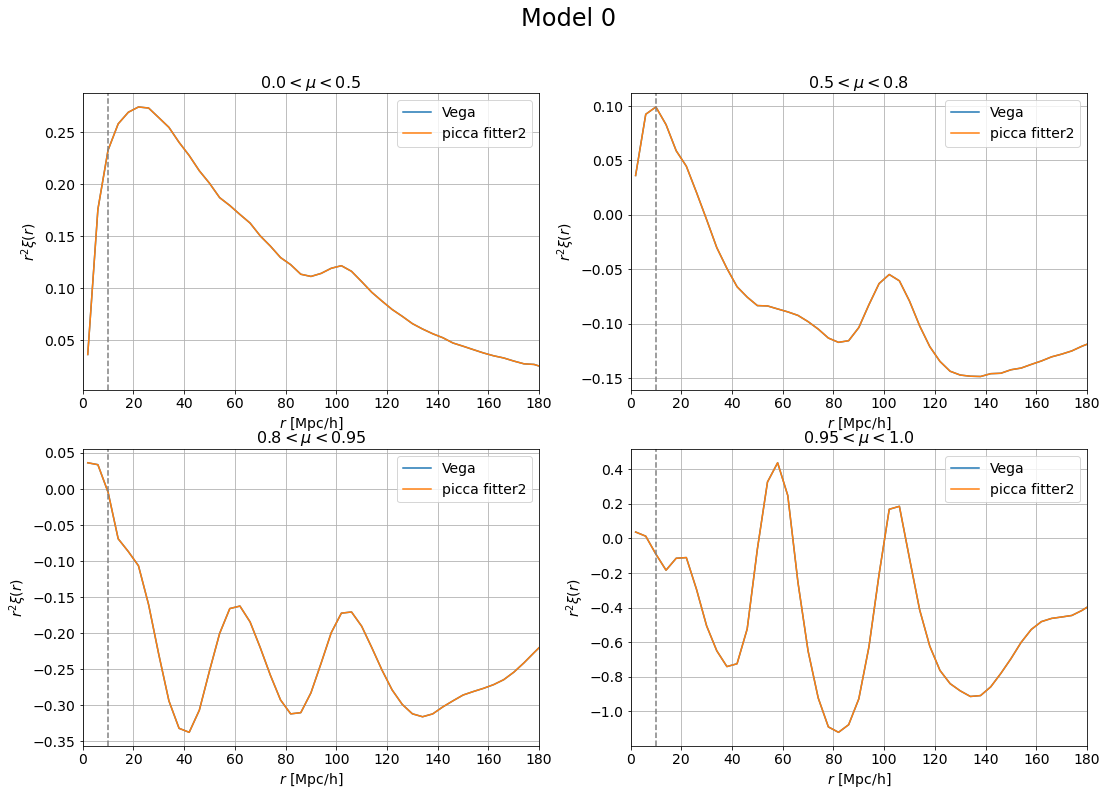

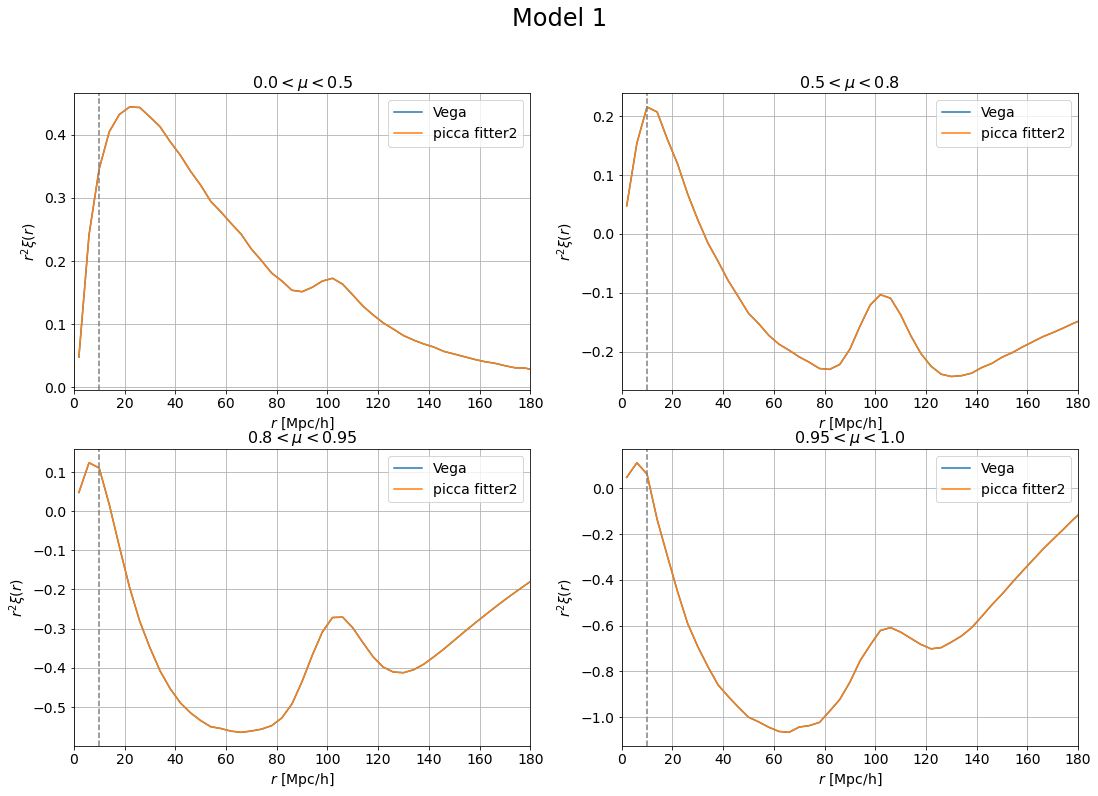

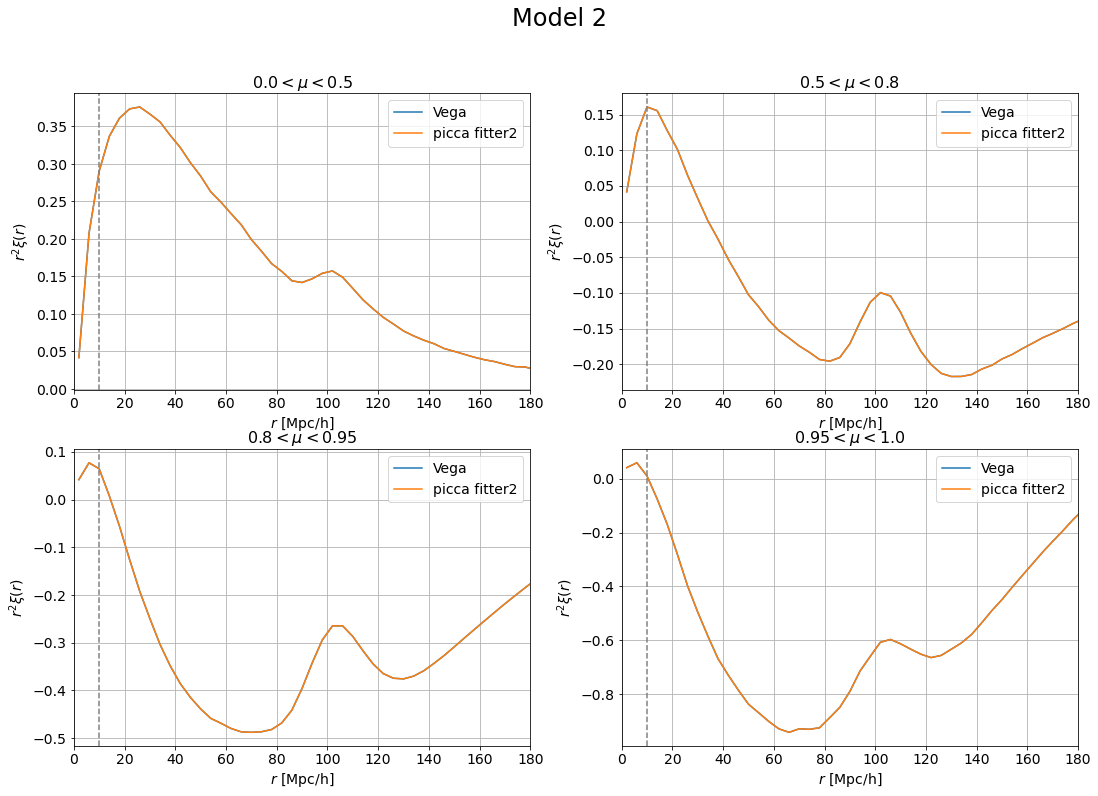

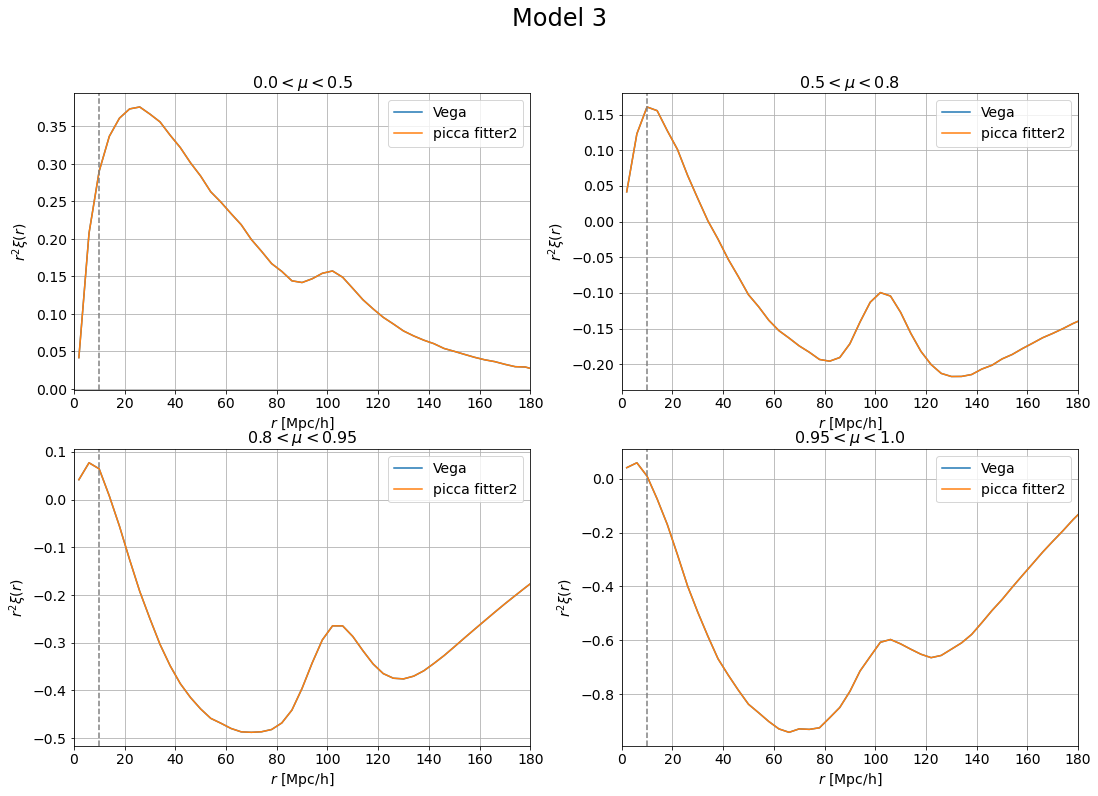

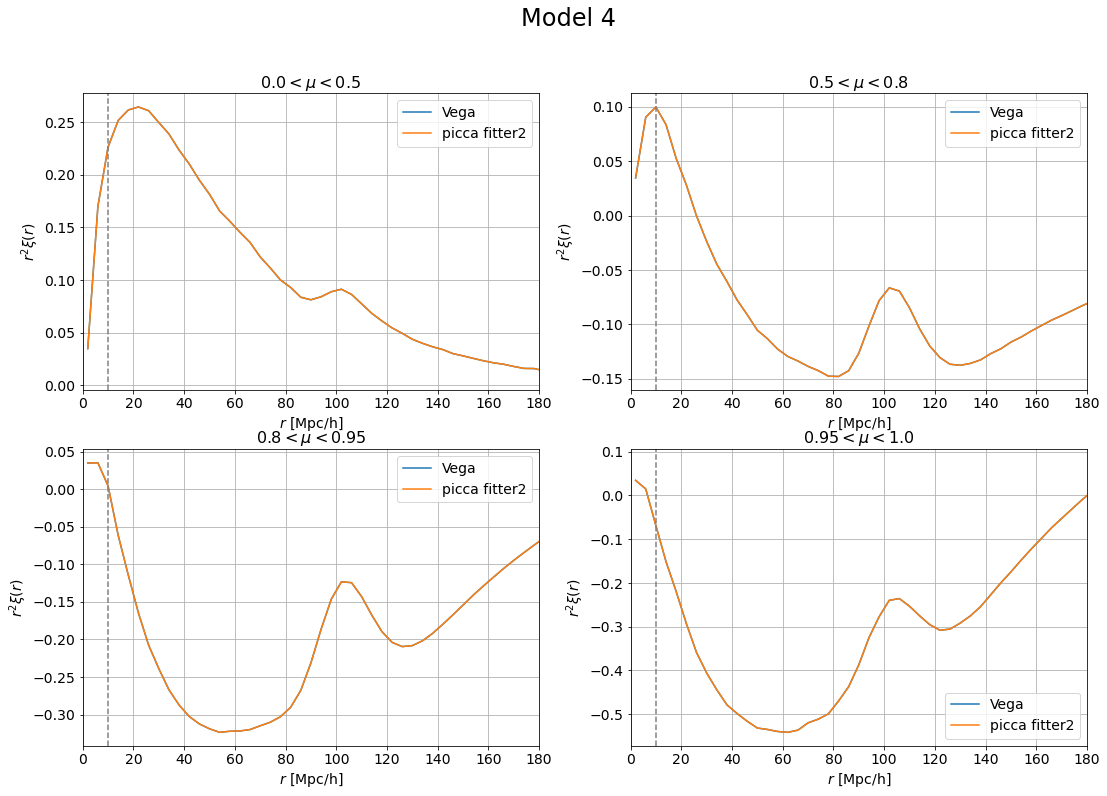

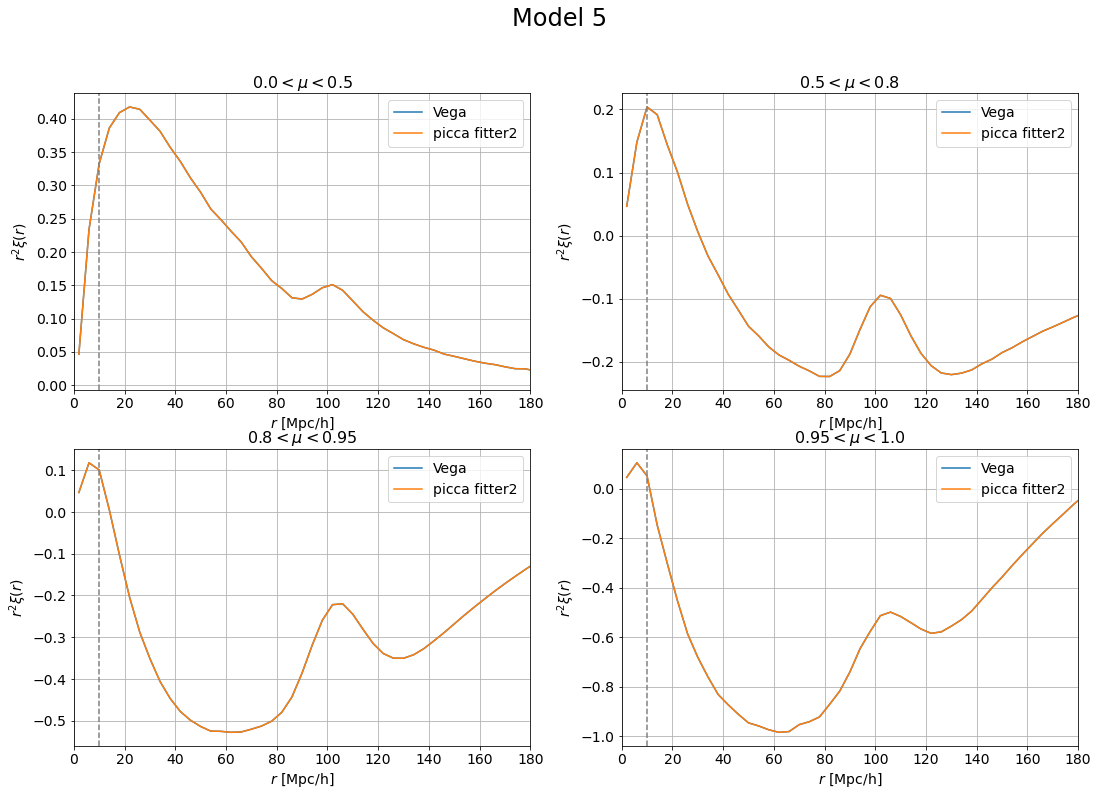

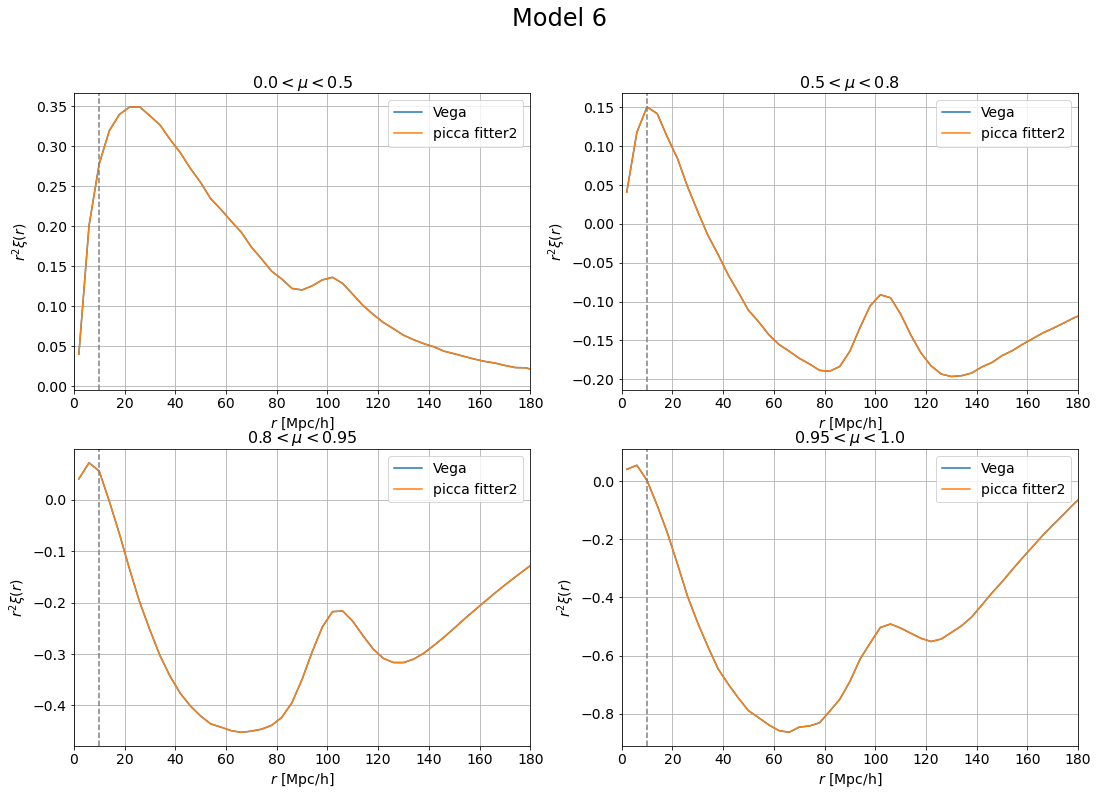

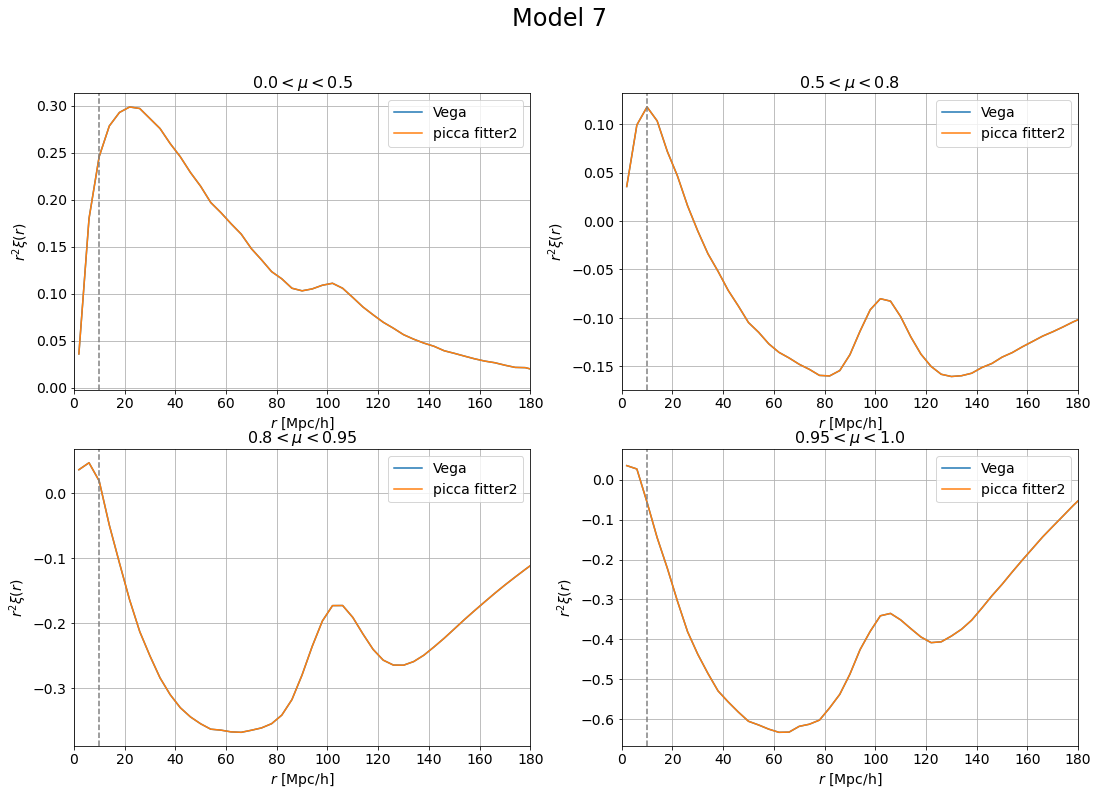

In [6]:
picca_models, vega_models = bench(fitter, vega)

### Use numpy.allclose to check if they produce the same models. This works for a relative tolerance of $10^{-3}$

In [7]:
for i, (picca_model, vega_model) in enumerate(zip(picca_models, vega_models)):
    print('Model ' + str(i) + ': ', np.allclose(picca_model, vega_model, rtol=1e-3))

Model 0:  True
Model 1:  True
Model 2:  True
Model 3:  True
Model 4:  True
Model 5:  True
Model 6:  True
Model 7:  True


### Initialize all the QSOxLya models

In [8]:
vega_cross = VegaInterface('configs/vega/main_cross.ini')
fitter_cross = fitter2('configs/picca/chi2_cross.ini')

INFO: reading input Pk /home/acuceu/work/dev/Vega/vega/models/PlanckDR16/PlanckDR16.fits
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
INFO: reading input Pk /home/acuceu/work/dev/picca/py/picca/fitter2/models/PlanckDR16/PlanckDR16.fits
INFO: reading /home/acuceu/work/notebooks/picca_bench/configs/picca/cross_test_0.ini
LOG: Full matrix is positive definite
LOG: Reduced matrix is positive definite
INFO: reading

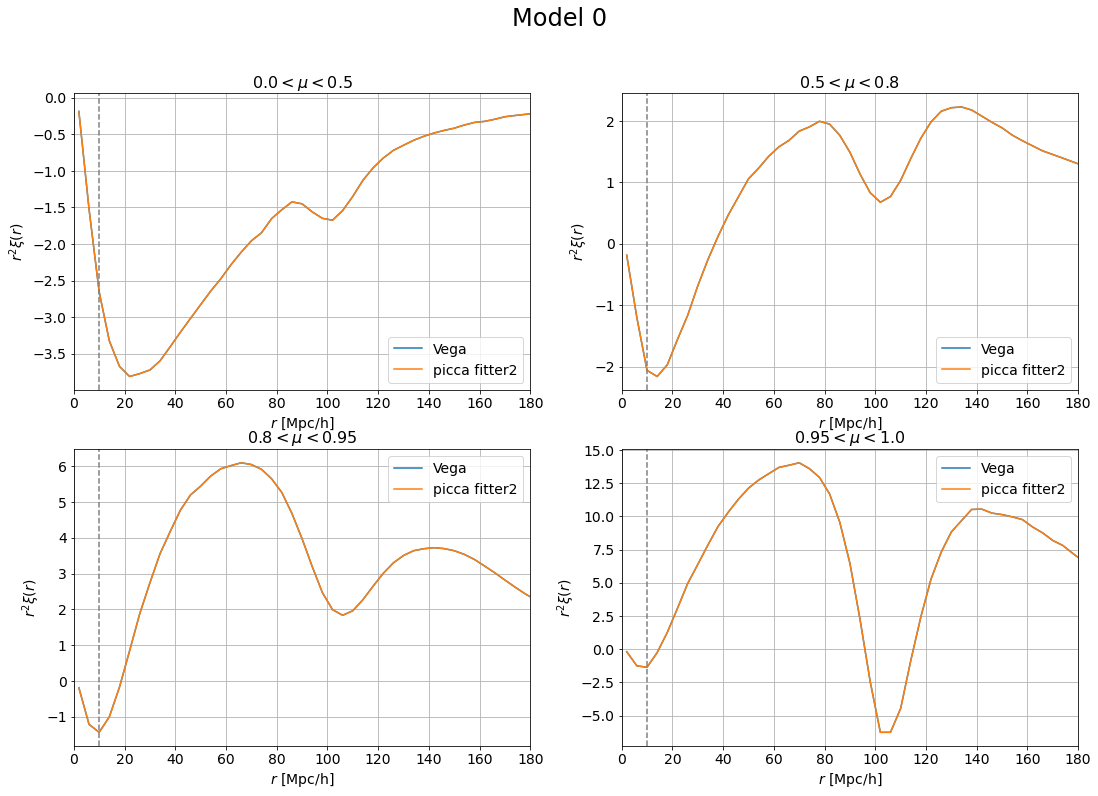

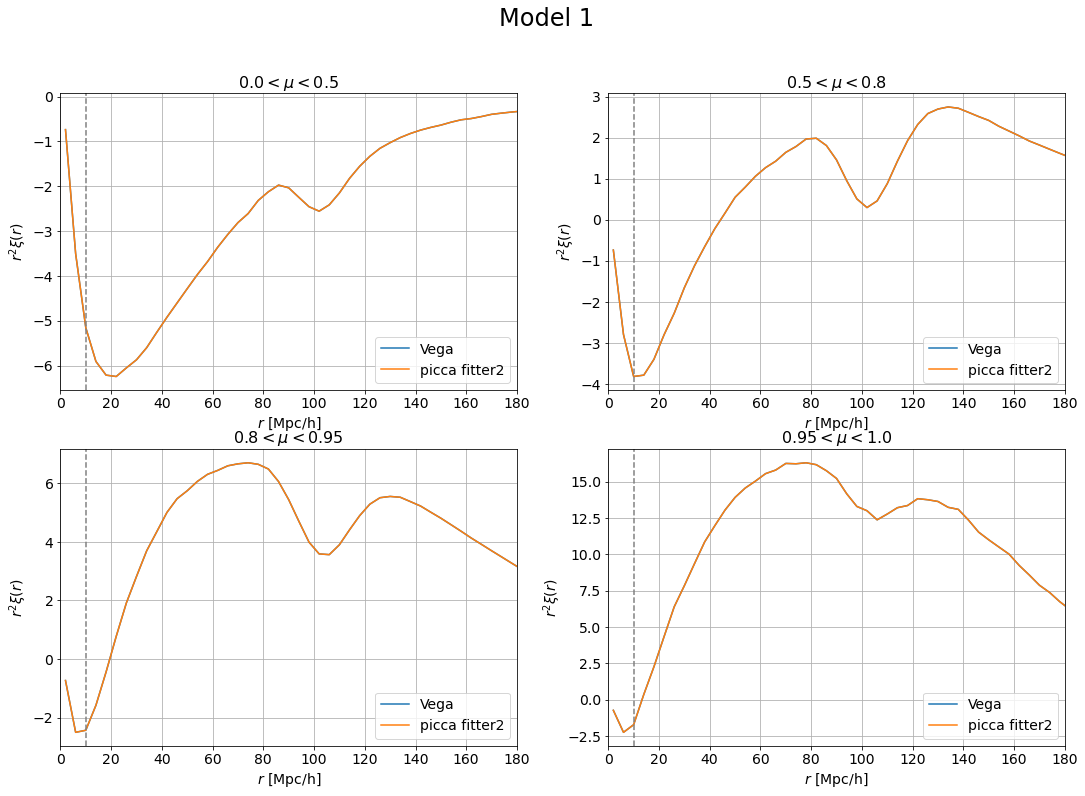

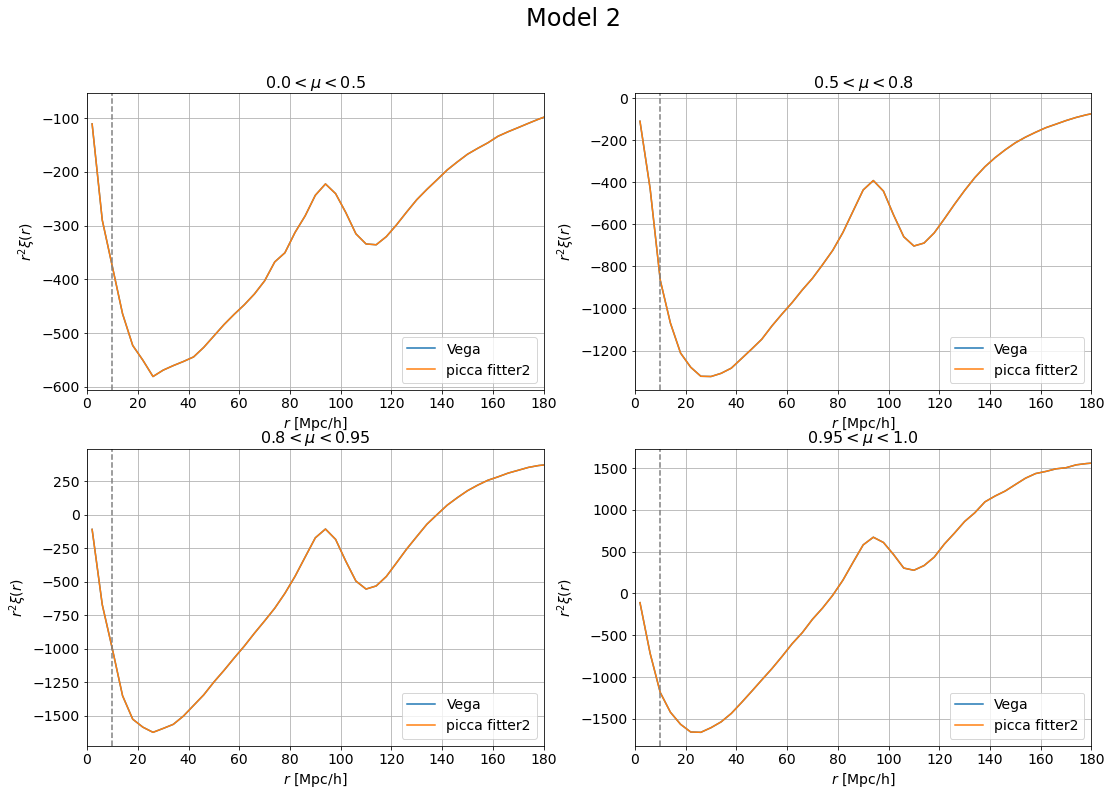

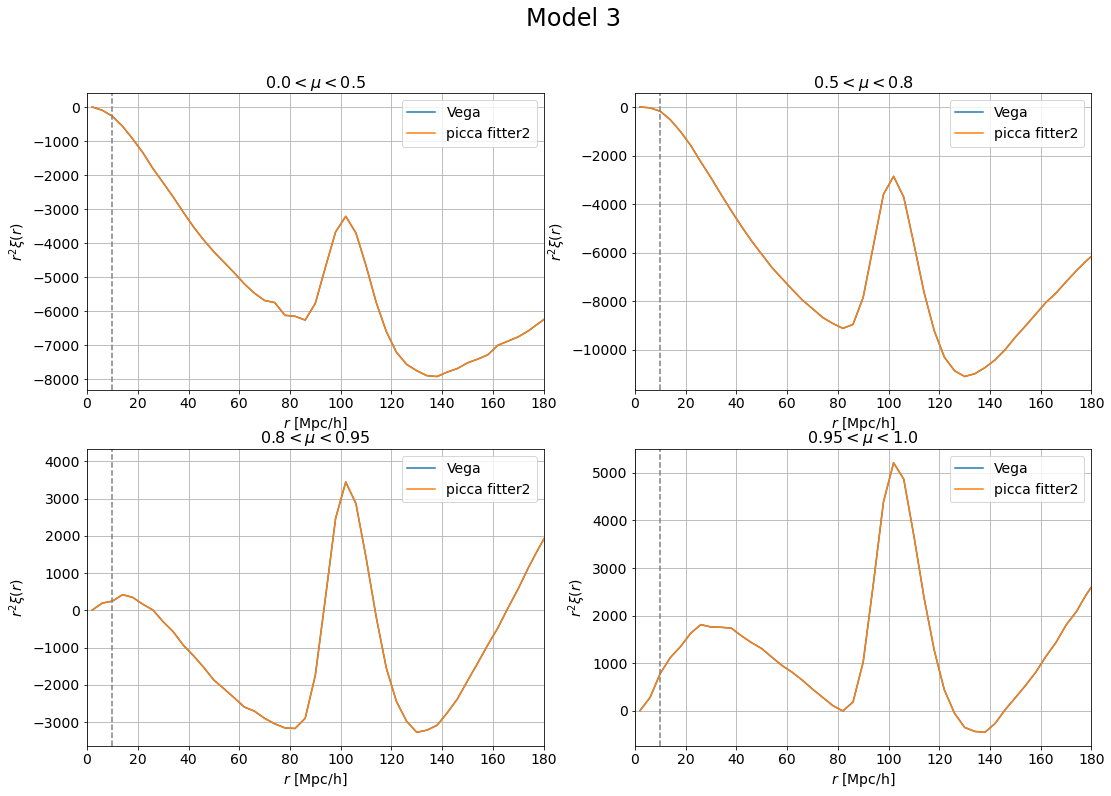

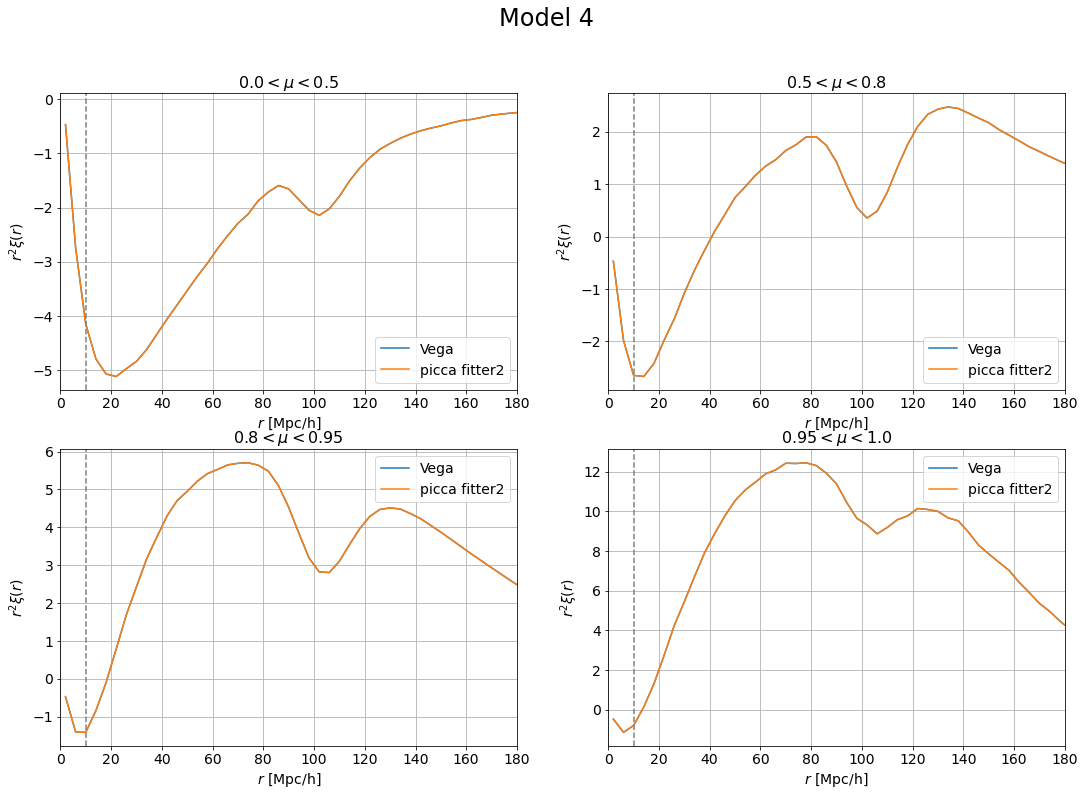

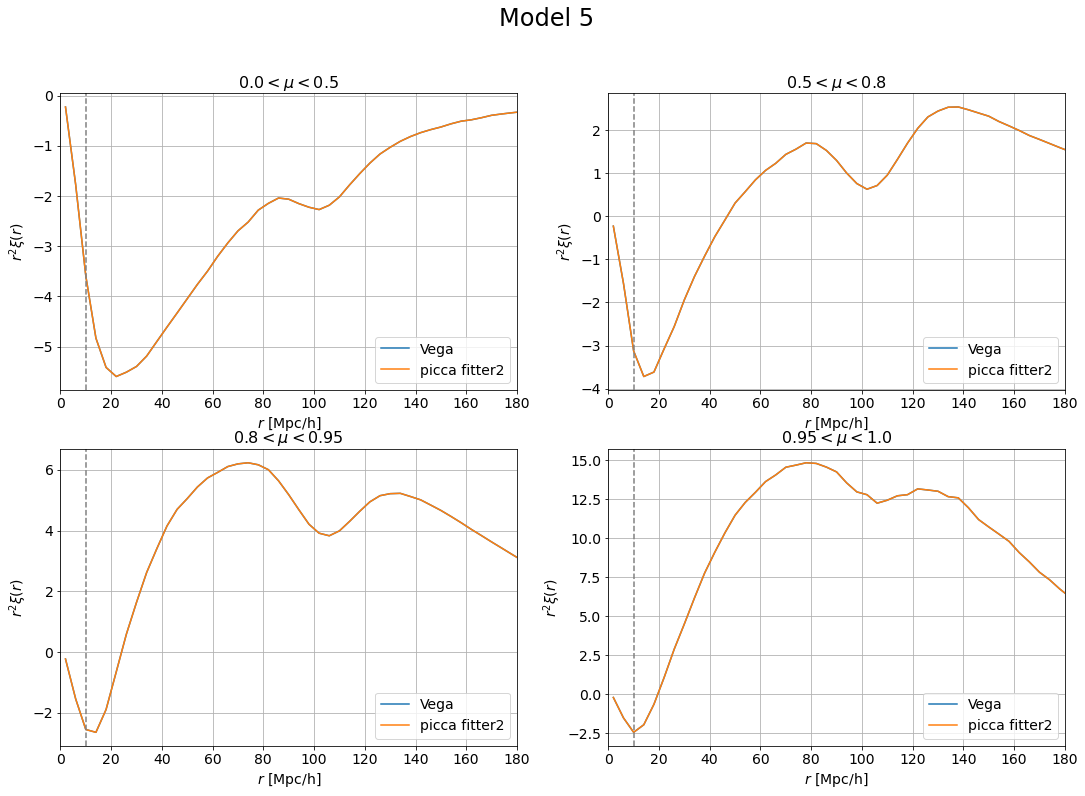

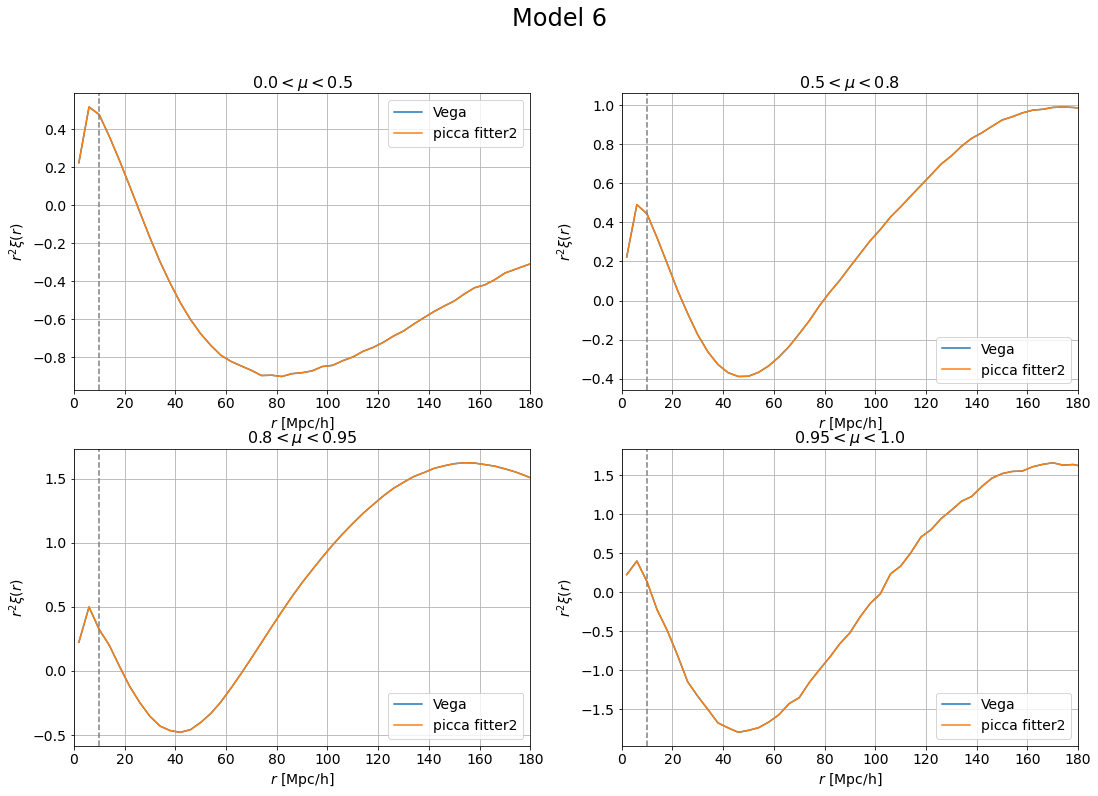

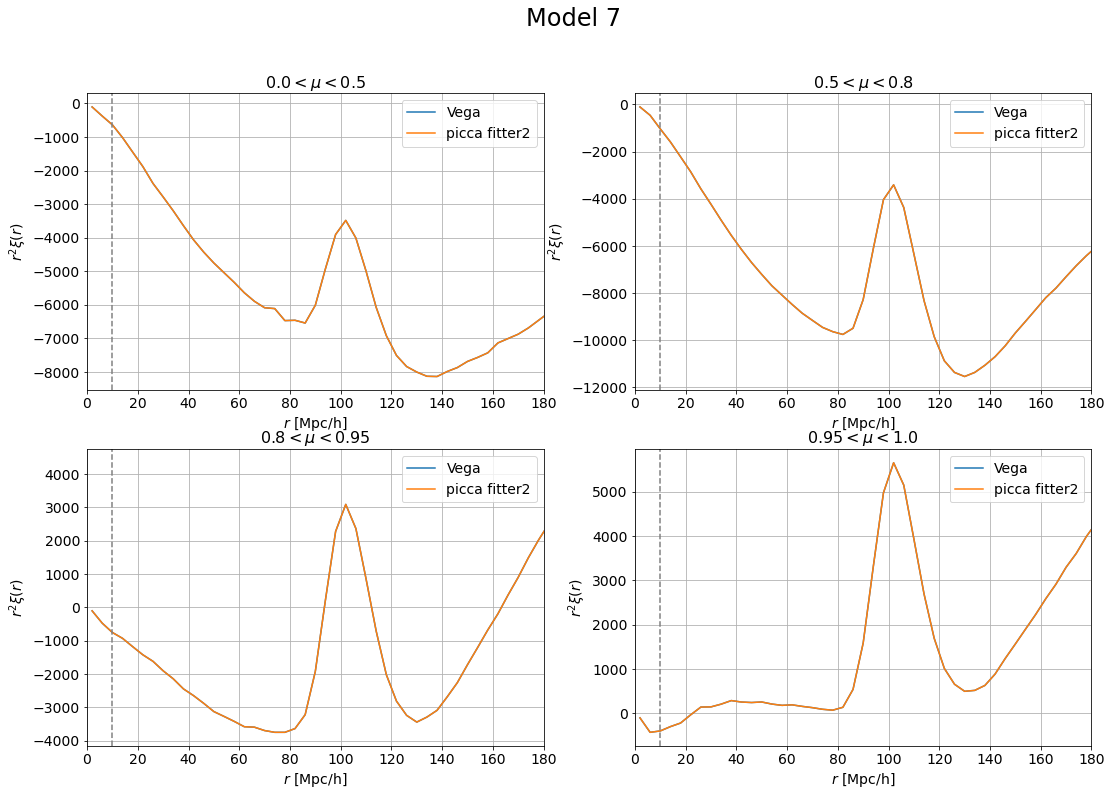

In [9]:
picca_models_cross, vega_models_cross = bench(fitter_cross, vega_cross, rp=(-200.,200.,100))

### Use numpy.allclose to check if they produce the same models. This works for a relative tolerance of $10^{-2}$

In [10]:
for i, (picca_model, vega_model) in enumerate(zip(picca_models_cross, vega_models_cross)):
    print('Model ' + str(i) + ': ', np.allclose(picca_model, vega_model, rtol=1e-2))

Model 0:  True
Model 1:  True
Model 2:  True
Model 3:  True
Model 4:  True
Model 5:  True
Model 6:  True
Model 7:  True
